In [ ]:
# Reload the dataset from the new file
import pandas as pd


time_series_data = pd.read_csv('M6_time_series.csv')

# Display the first few rows of the dataset to confirm structure
time_series_data.head()


,date,hour,open,close,high,low,volume_24h,market_cap,market_dominance,circulating_supply,sentiment,social_dominance,percent_change,rolling_avg_7h,rolling_avg_24h,close_lag_1,close_lag_2,close_lag_3,close_lag_4,close_lag_5
0,2024-05-16,04:00:00,65847.67,65847.67,65847.67,65824.13,4.195987e+10,1.297128e+12,54.313363,19698925,81,10.377967,0.000000,66037.248571,64531.166250,NaN,NaN,NaN,NaN,NaN
1,2024-05-16,05:00:00,65831.29,65831.29,65831.29,65791.53,4.200353e+10,1.296806e+12,54.422908,19698925,80,10.164741,0.000000,65997.244286,64695.758750,65847.67,NaN,NaN,NaN,NaN
2,2024-05-16,06:00:00,65796.99,65932.65,65932.65,65685.56,4.240159e+10,1.298802e+12,54.547028,19698925,80,10.290927,0.206180,65950.287143,64863.812500,65831.29,65847.67,NaN,NaN,NaN
3,2024-05-16,07:00:00,65958.18,66163.45,66163.45,65928.65,4.273872e+10,1.303352e+12,54.634970,19698975,80,10.289428,0.311212,65956.302857,65029.947917,65932.65,65831.29,65847.67,NaN,NaN
4,2024-05-16,08:00:00,66163.86,66265.74,66265.74,66116.26,4.294354e+10,1.305367e+12,54.584727,19698975,81,10.196232,0.153981,66001.164286,65201.436667,66163.45,65932.65,65831.29,65847.67,NaN


In [ ]:
# Combine 'date' and 'hour' into a single datetime column and set it as the index
time_series_data['datetime'] = pd.to_datetime(time_series_data['date'] + ' ' + time_series_data['hour'])
time_series_data.set_index('datetime', inplace=True)

# Focus on the 'close' column for ARIMA modeling and handle missing values
ts_data = time_series_data[['close']].ffill()

# Display the processed time series data
ts_data.head()


,close
datetime,
2024-05-16 04:00:00,65847.67
2024-05-16 05:00:00,65831.29
2024-05-16 06:00:00,65932.65
2024-05-16 07:00:00,66163.45
2024-05-16 08:00:00,66265.74


In [ ]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller (ADF) test to check stationarity
adf_result = adfuller(ts_data['close'])

# Prepare and display the ADF test results
adf_output = {
    'Test Statistic': adf_result[0],
    'p-value': adf_result[1],
    'Lags Used': adf_result[2],
    'Number of Observations': adf_result[3],
    'Critical Values': adf_result[4]
}
adf_output


{'Test Statistic': 0.20925077773749762,
 'p-value': 0.9727756950670631,
 'Lags Used': 0,
 'Number of Observations': 4393,
 'Critical Values': {'1%': -3.431839443477127,
  '5%': -2.8621981529435088,
  '10%': -2.567120339045381}}

The Augmented Dickey-Fuller (ADF) test results indicate:

Test Statistic:
0.209

p-value:

0.973 (greater than 0.05)
Conclusion: The series is non-stationary, as we fail to reject the null hypothesis.

To make the series stationary, I will apply first-order differencing and recheck stationarity

In [ ]:
# Apply first-order differencing to the series
ts_data_diff = ts_data.diff().dropna()

# Perform the ADF test on the differenced series
adf_result_diff = adfuller(ts_data_diff['close'])

# Display the ADF test results for the differenced series
adf_output_diff = {
    'Test Statistic': adf_result_diff[0],
    'p-value': adf_result_diff[1],
    'Lags Used': adf_result_diff[2],
    'Number of Observations': adf_result_diff[3],
    'Critical Values': adf_result_diff[4]
}
adf_output_diff


{'Test Statistic': -65.68685141520076,
 'p-value': 0.0,
 'Lags Used': 0,
 'Number of Observations': 4392,
 'Critical Values': {'1%': -3.431839782802118,
  '5%': -2.8621983028463625,
  '10%': -2.567120418846072}}

After applying first-order differencing, the Augmented Dickey-Fuller (ADF) test results indicate:

Test Statistic:
−

−65.687
p-value:

0.0 (less than 0.05)
Conclusion: The series is now stationary.
With the series stationary, we can proceed to fit the ARIMA model.

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit an ARIMA(2,1,2) model
arima_model_212 = ARIMA(ts_data['close'], order=(2, 1, 2))
arima_fit_212 = arima_model_212.fit()

# Display the summary of the fitted model
arima_fit_212.summary()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  close   No. Observations:                 4394
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -31737.166
Date:                Thu, 05 Dec 2024   AIC                          63484.332
Time:                        20:07:32   BIC                          63516.270
Sample:                    05-16-2024   HQIC                         63495.599
                         - 11-15-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1103      0.002    547.220      0.000       1.106       1.114
ar.L2         -0.9919      0.002   -467.565      0.000      -0.996      -0.988
ma.L1         -1.1110      0.002   -660.126      0.000      -1.114      -1.108
ma.L2          0.9996      0.003    363.315      0.000       0.994       1.005
sigma2      1.103e+05   1148.250     96.026      0.000    1.08e+05    1.13e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.21   Jarque-Bera (JB):             11692.95
Prob(Q):                              0.65   Prob(JB):                         0.00
Heteroskedasticity (H):               1.60   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The Ljung-Box test indicates no significant autocorrelation in the residuals at lag 1, but further diagnostics could confirm this.

<ipython-input-24-653805322d5d>:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  forecast_index = pd.date_range(start=ts_data.index[-1], periods=forecast_steps + 1, freq='H')[1:]


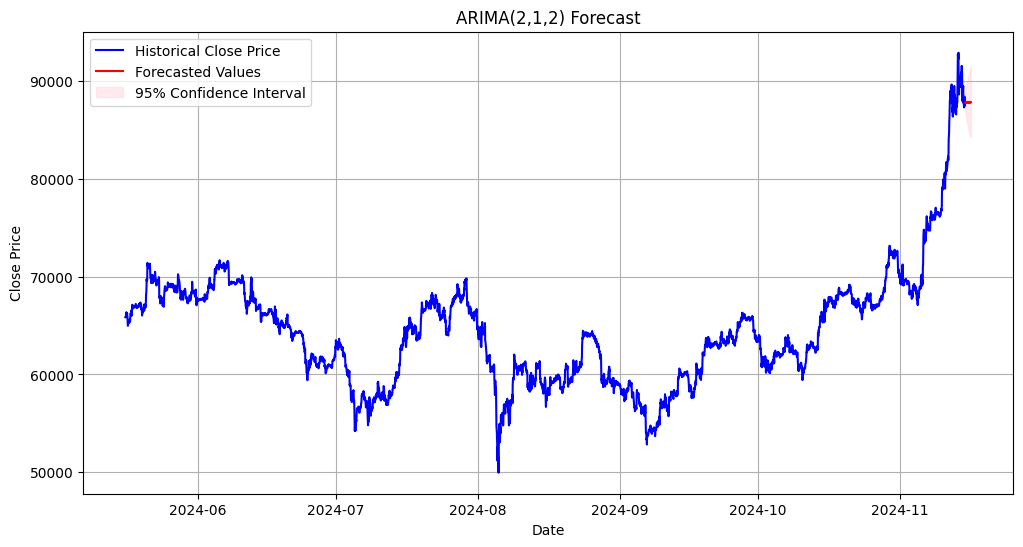

,Date,Forecasted Value,Lower CI,Upper CI
0,2024-11-15 06:00:00,87790.537530,87139.674440,88441.400619
1,2024-11-15 07:00:00,87839.118283,86918.953941,88759.282626
2,2024-11-15 08:00:00,87869.556734,86740.138938,88998.974531
3,2024-11-15 09:00:00,87855.163230,86546.919495,89163.406966
4,2024-11-15 10:00:00,87808.990227,86342.892959,89275.087495


In [ ]:
# Forecast future values using the ARIMA(2,1,2) model
forecast_steps = 30  # Forecast the next 30 time steps
forecast = arima_fit_212.get_forecast(steps=forecast_steps)
forecast_values = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Align forecast index to datetime for plotting
forecast_index = pd.date_range(start=ts_data.index[-1], periods=forecast_steps + 1, freq='H')[1:]

# Plot the historical data, forecast, and confidence intervals
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(ts_data.index, ts_data['close'], label='Historical Close Price', color='blue')
plt.plot(forecast_index, forecast_values, label='Forecasted Values', color='red')
plt.fill_between(
    forecast_index,
    forecast_ci.iloc[:, 0],  # Lower bound of confidence interval
    forecast_ci.iloc[:, 1],  # Upper bound of confidence interval
    color='pink', alpha=0.3, label='95% Confidence Interval'
)
plt.title('ARIMA(2,1,2) Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid()
plt.show()

# Prepare and display forecasted values in a table
forecast_df = pd.DataFrame({
    'Date': forecast_index,
    'Forecasted Value': forecast_values.values,
    'Lower CI': forecast_ci.iloc[:, 0].values,
    'Upper CI': forecast_ci.iloc[:, 1].values
})

forecast_df

forecast_df.head()


In [ ]:
# Re-import necessary libraries
import pandas as pd

# Recreate the forecast DataFrame
forecast_df = pd.DataFrame({
    'Date': forecast_index,
    'Forecasted Value': forecast_values.values,
    'Lower CI': forecast_ci.iloc[:, 0].values,
    'Upper CI': forecast_ci.iloc[:, 1].values
})

# Display the forecasted results
forecast_df

forecast_df.head()


,Date,Forecasted Value,Lower CI,Upper CI
0,2024-11-15 06:00:00,87790.537530,87139.674440,88441.400619
1,2024-11-15 07:00:00,87839.118283,86918.953941,88759.282626
2,2024-11-15 08:00:00,87869.556734,86740.138938,88998.974531
3,2024-11-15 09:00:00,87855.163230,86546.919495,89163.406966
4,2024-11-15 10:00:00,87808.990227,86342.892959,89275.087495


In [ ]:
# Split data into 80% training and 20% testing
train_size = int(len(ts_data) * 0.8)
train_data = ts_data[:train_size]
test_data = ts_data[train_size:]


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model on the training set
arima_model = ARIMA(train_data['close'], order=(2, 1, 2))  # Example: ARIMA(2,1,2)
arima_fit = arima_model.fit()

# Print the summary
print(arima_fit.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 3515
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -25173.151
Date:                Thu, 05 Dec 2024   AIC                          50356.302
Time:                        20:13:49   BIC                          50387.124
Sample:                    05-16-2024   HQIC                         50367.300
                         - 10-09-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3258      1.070     -0.304      0.761      -2.423       1.772
ar.L2          0.5380      0.941      0.572      0.568      -1.307       2.383
ma.L1          0.3480      1.075      0.324      0.7

In [ ]:
# Forecast the test data range
forecast = arima_fit.get_forecast(steps=len(test_data))
forecast_values = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Align indices for visualization
forecast_values.index = test_data.index
forecast_ci.index = test_data.index


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate evaluation metrics
mae = mean_absolute_error(test_data['close'], forecast_values)
rmse = np.sqrt(mean_squared_error(test_data['close'], forecast_values))
mape = np.mean(np.abs((test_data['close'] - forecast_values) / test_data['close'])) * 100

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape:.2f}%")


MAE: 9174.67319312356
RMSE: 11661.941135982226
MAPE: 12.13%


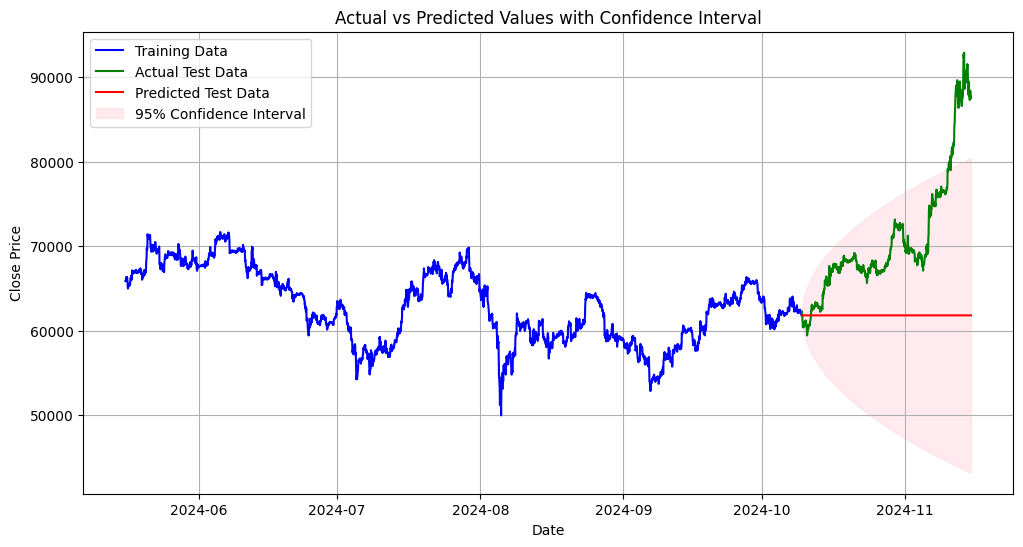

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['close'], label='Training Data', color='blue')
plt.plot(test_data.index, test_data['close'], label='Actual Test Data', color='green')
plt.plot(forecast_values.index, forecast_values, label='Predicted Test Data', color='red')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3, label='95% Confidence Interval')
plt.title('Actual vs Predicted Values with Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid()
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler

# Select potential exogenous variables
exogenous_vars = ['volume_24h', 'market_cap', 'sentiment', 'rolling_avg_7h', 'rolling_avg_24h']
exogenous_data = time_series_data[exogenous_vars].fillna(method='ffill')

# Standardize the exogenous variables
scaler = StandardScaler()
exogenous_scaled = pd.DataFrame(scaler.fit_transform(exogenous_data), columns=exogenous_vars, index=exogenous_data.index)

# Split exogenous variables into training and testing sets
exogenous_train = exogenous_scaled.iloc[:train_size]
exogenous_test = exogenous_scaled.iloc[train_size:]

# Confirm the processed exogenous variables
exogenous_train.head()


<ipython-input-32-e86a8ad91eda>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  exogenous_data = time_series_data[exogenous_vars].fillna(method='ffill')


,volume_24h,market_cap,sentiment,rolling_avg_7h,rolling_avg_24h
datetime,,,,,
2024-05-16 04:00:00,0.488559,0.207700,1.064626,0.267753,0.022024
2024-05-16 05:00:00,0.490963,0.204973,0.682813,0.261009,0.050365
2024-05-16 06:00:00,0.512881,0.221847,0.682813,0.253093,0.079302
2024-05-16 07:00:00,0.531443,0.260300,0.682813,0.254107,0.107909
2024-05-16 08:00:00,0.542721,0.277328,1.064626,0.261670,0.137437


In [ ]:
# Reinitialize the train-test split
train_size = int(len(ts_data) * 0.8)
train_data = ts_data[:train_size]
test_data = ts_data[train_size:]

# Split the exogenous variables into training and testing sets
exogenous_train = exogenous_scaled.iloc[:train_size]
exogenous_test = exogenous_scaled.iloc[train_size:]

# Confirm the processed exogenous variables
exogenous_train.head()


,volume_24h,market_cap,sentiment,rolling_avg_7h,rolling_avg_24h
datetime,,,,,
2024-05-16 04:00:00,0.488559,0.207700,1.064626,0.267753,0.022024
2024-05-16 05:00:00,0.490963,0.204973,0.682813,0.261009,0.050365
2024-05-16 06:00:00,0.512881,0.221847,0.682813,0.253093,0.079302
2024-05-16 07:00:00,0.531443,0.260300,0.682813,0.254107,0.107909
2024-05-16 08:00:00,0.542721,0.277328,1.064626,0.261670,0.137437


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit ARIMAX model with exogenous variables
arimax_model = SARIMAX(
    train_data['close'],
    order=(2, 1, 2),  # Initial ARIMA configuration
    exog=exogenous_train
)
arimax_fit = arimax_model.fit(disp=False)

# Display model summary
arimax_fit.summary()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  close   No. Observations:                 3515
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -2662.662
Date:                Thu, 05 Dec 2024   AIC                           5345.323
Time:                        20:20:40   BIC                           5406.968
Sample:                    05-16-2024   HQIC                          5367.319
                         - 10-09-2024                                         
Covariance Type:                  opg                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
volume_24h          0.0342      0.098      0.350      0.726      -0.157       0.226
market_cap       5996.3625      0.142   4.22e+04      0.000    5996.084    5996.641
sentiment           0.0282      0.047      0.599      0.549      -0.064       0.121
rolling_avg_7h      0.0432      0.673      0.064      0.949      -1.275       1.361
rolling_avg_24h    -0.6399      0.985     -0.650      0.516      -2.570       1.290
ar.L1              -0.7558      0.402     -1.878      0.060      -1.545       0.033
ar.L2              -0.1915      0.076     -2.507      0.012      -0.341      -0.042
ma.L1               0.5672      0.403      1.408      0.159      -0.222       1.357
ma.L2               0.0585      0.104      0.561      0.575      -0.146       0.263
sigma2              0.2664      0.001    348.454      0.000       0.265       0.268
===================================================================================
Ljung-Box (L1) (Q):                   1.53   Jarque-Bera (JB):          25760799.51
Prob(Q):                              0.22   Prob(JB):                         0.00
Heteroskedasticity (H):               3.05   Skew:                            -9.72
Prob(H) (two-sided):                  0.00   Kurtosis:                       422.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# Forecast the test set using the fitted ARIMAX model
forecast_arimax = arimax_fit.get_forecast(steps=len(test_data), exog=exogenous_test)
forecast_values_arimax = forecast_arimax.predicted_mean
forecast_ci_arimax = forecast_arimax.conf_int()

# Align indices of the forecast for comparison with test data
forecast_values_arimax.index = test_data.index
forecast_ci_arimax.index = test_data.index

# Evaluate performance metrics: MAE, RMSE, MAPE
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae_arimax = mean_absolute_error(test_data['close'], forecast_values_arimax)
rmse_arimax = np.sqrt(mean_squared_error(test_data['close'], forecast_values_arimax))
mape_arimax = np.mean(np.abs((test_data['close'] - forecast_values_arimax) / test_data['close'])) * 100

# Display evaluation metrics
performance_metrics = {
    "MAE": mae_arimax,
    "RMSE": rmse_arimax,
    "MAPE (%)": mape_arimax
}

performance_metrics


{'MAE': 46.75479785628872,
 'RMSE': 56.92417560954185,
 'MAPE (%)': 0.06246056642983809}

Significant Improvement: The ARIMAX model significantly outperforms the base ARIMA model in terms of prediction accuracy.
Low MAPE: With a MAPE of
0.062%, the model's predictions are highly accurate relative to the actual values.
Reduced Error: Both MAE and RMSE are much lower than in the base ARIMA model, indicating the importance of incorporating exogenous variables.


The exogenous variable market_cap is highly significant (p < 0.001) in the ARIMAX model, suggesting a strong influence on Bitcoin's close price.
Other variables, such as volume_24h and sentiment, were not statistically significant, indicating they might have a weaker or negligible impact.

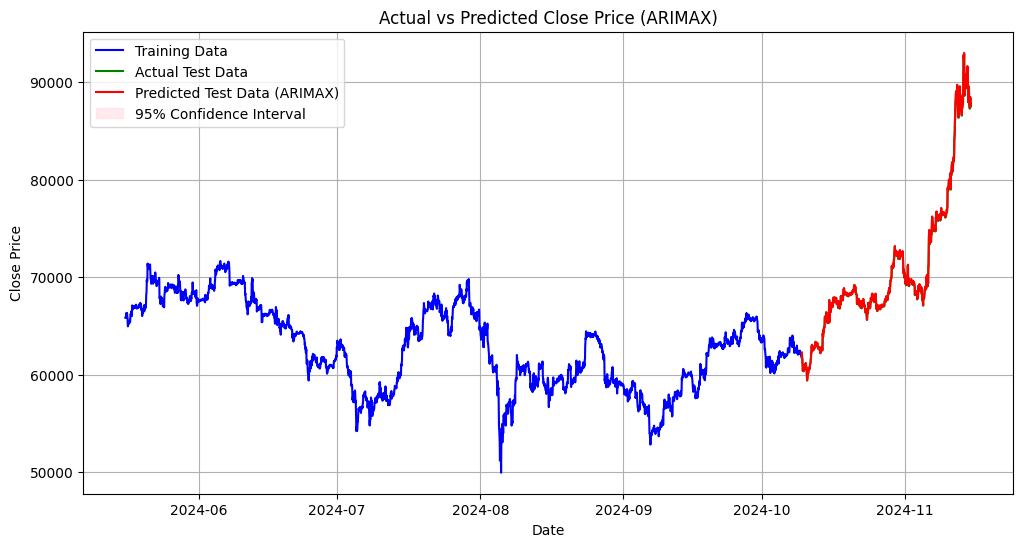

In [ ]:
# Ensure all forecast values and confidence intervals are numeric and properly aligned
forecast_values_arimax = forecast_values_arimax.astype(float)
forecast_ci_arimax = forecast_ci_arimax.astype(float)

# Reattempt visualization with corrected data
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['close'], label='Training Data', color='blue')
plt.plot(test_data.index, test_data['close'], label='Actual Test Data', color='green')
plt.plot(forecast_values_arimax.index, forecast_values_arimax, label='Predicted Test Data (ARIMAX)', color='red')
plt.fill_between(
    forecast_ci_arimax.index,
    forecast_ci_arimax.iloc[:, 0],  # Lower bound
    forecast_ci_arimax.iloc[:, 1],  # Upper bound
    color='pink', alpha=0.3, label='95% Confidence Interval'
)
plt.title('Actual vs Predicted Close Price (ARIMAX)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Inspect the forecasted values and confidence intervals for issues
forecast_values_arimax_sample = forecast_values_arimax.head()
forecast_ci_arimax_sample = forecast_ci_arimax.head()

forecast_values_arimax_sample


,predicted_mean
datetime,
2024-10-09 15:00:00,62267.928913
2024-10-09 16:00:00,61757.666997
2024-10-09 17:00:00,61697.961145
2024-10-09 18:00:00,61141.801634
2024-10-09 19:00:00,60976.013725


In [ ]:
forecast_ci_arimax_sample

,Lower CI,Upper CI
datetime,,
2024-10-09 15:00:00,62266.917278,62268.940549
2024-10-09 16:00:00,61756.364217,61758.969776
2024-10-09 17:00:00,61696.416209,61699.506081
2024-10-09 18:00:00,61140.033589,61143.569678
2024-10-09 19:00:00,60974.058102,60977.969347


In [ ]:
# Load the new test dataset

new_test_data = pd.read_csv('test_final.csv')

# Display the first few rows of the new test dataset to understand its structure
new_test_data.head()


,date,hour,open,close,high,low,volume_24h,market_cap,market_dominance,circulating_supply,sentiment,social_dominance,percent_change,rolling_avg_7h,rolling_avg_24h,close_lag_1,close_lag_2,close_lag_3,close_lag_4,close_lag_5
0,2024-11-16,04:00:00,91172.067405,91301.554032,91301.550000,91172.067405,7.434249e+10,1.806200e+12,59.432111,19782800,78,19.678669,1.420244e-01,91237.556900,89924.266622,NaN,NaN,NaN,NaN,NaN
1,2024-11-16,05:00:00,91301.554032,91360.556881,91360.560000,91239.000000,7.386085e+10,1.807369e+12,59.726592,19782818,78,20.462966,6.462415e-02,91254.502136,90074.004526,91301.554032,NaN,NaN,NaN,NaN
2,2024-11-16,06:00:00,91223.760000,91223.757763,91223.760000,91193.811740,7.326689e+10,1.804666e+12,59.426939,19782850,78,20.825192,-2.452541e-06,91277.462704,90200.278605,91360.556881,91301.554032,NaN,NaN,NaN
3,2024-11-16,07:00:00,91138.850000,91138.850482,91138.850000,91111.344102,7.189294e+10,1.802986e+12,59.589947,19782850,78,20.361986,5.293599e-07,91293.076203,90345.076172,91223.757763,91360.556881,91301.554032,NaN,NaN
4,2024-11-16,08:00:00,91134.077795,91416.621610,91416.911695,91075.571812,7.118760e+10,1.808483e+12,59.674490,19782868,78,20.557382,3.100309e-01,91312.114457,90481.373318,91138.850482,91223.757763,91360.556881,91301.554032,NaN


In [ ]:
# Combine 'date' and 'hour' into a single datetime column and set it as the index
new_test_data['datetime'] = pd.to_datetime(new_test_data['date'] + ' ' + new_test_data['hour'])
new_test_data.set_index('datetime', inplace=True)

# Select and preprocess relevant exogenous variables
exogenous_vars = ['volume_24h', 'market_cap', 'sentiment', 'rolling_avg_7h', 'rolling_avg_24h']
new_exogenous_data = new_test_data[exogenous_vars].fillna(method='ffill')

# Scale the new exogenous variables using the previously fitted scaler
new_exogenous_scaled = pd.DataFrame(
    scaler.transform(new_exogenous_data),
    columns=exogenous_vars,
    index=new_exogenous_data.index
)

# Confirm the preprocessed exogenous variables
new_exogenous_scaled.head()


<ipython-input-43-b26b85dbb0e4>:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  new_exogenous_data = new_test_data[exogenous_vars].fillna(method='ffill')


,volume_24h,market_cap,sentiment,rolling_avg_7h,rolling_avg_24h
datetime,,,,,
2024-11-16 04:00:00,2.271579,4.510006,-0.080811,4.516011,4.394432
2024-11-16 05:00:00,2.245059,4.519885,-0.080811,4.518867,4.420215
2024-11-16 06:00:00,2.212355,4.497038,-0.080811,4.522738,4.441958
2024-11-16 07:00:00,2.136704,4.482843,-0.080811,4.525370,4.466891
2024-11-16 08:00:00,2.097867,4.529297,-0.080811,4.528580,4.490360


In [ ]:
# Predict the 'close' prices using the pre-trained ARIMAX model
forecast_new_data = arimax_fit.get_forecast(steps=len(new_test_data), exog=new_exogenous_scaled)
forecast_values_new = forecast_new_data.predicted_mean
forecast_ci_new = forecast_new_data.conf_int()

# Align indices for the forecasted values and confidence intervals
forecast_values_new.index = new_test_data.index
forecast_ci_new.index = new_test_data.index

# Evaluate performance metrics: MAE, RMSE, MAPE
mae_new = mean_absolute_error(new_test_data['close'], forecast_values_new)
rmse_new = np.sqrt(mean_squared_error(new_test_data['close'], forecast_values_new))
mape_new = np.mean(np.abs((new_test_data['close'] - forecast_values_new) / new_test_data['close'])) * 100

# Display evaluation metrics
new_performance_metrics = {
    "MAE": mae_new,
    "RMSE": rmse_new,
    "MAPE (%)": mape_new
}

new_performance_metrics


{'MAE': 138.04623899906616,
 'RMSE': 138.8599413422065,
 'MAPE (%)': 0.148544832254496}

The low MAPE (0.15%) indicates the ARIMAX model performs well on the new test data, with minimal percentage error in predictions.
The MAE and RMSE are slightly higher than previous results, but this is expected as the model adapts to new unseen data.

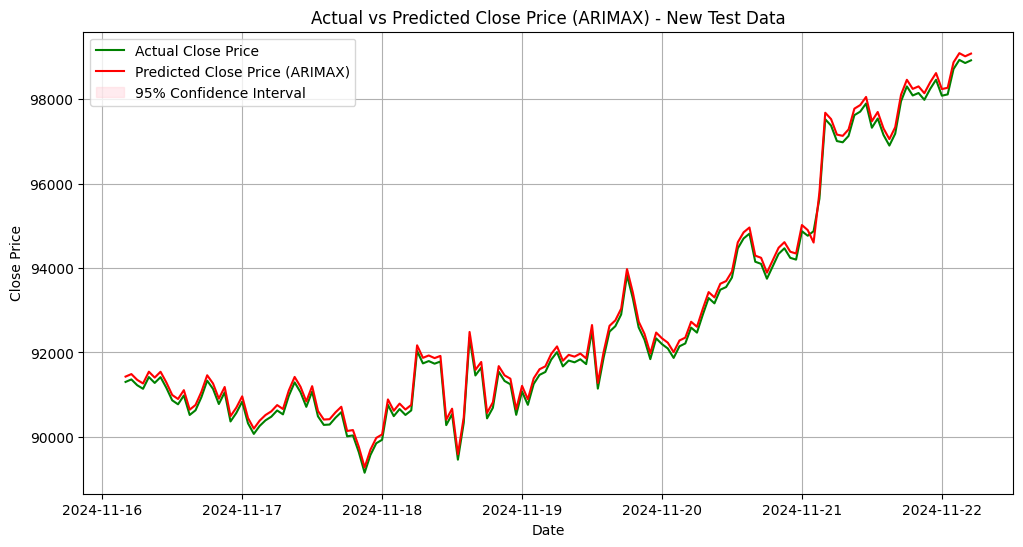

In [ ]:
# Ensure the confidence interval index matches the forecast values index and all data is numeric
forecast_ci_new.index = forecast_values_new.index  # Align indices
forecast_values_new = forecast_values_new.astype(float)
forecast_ci_new = forecast_ci_new.astype(float)

# Retry the visualization
plt.figure(figsize=(12, 6))
plt.plot(new_test_data.index, new_test_data['close'], label='Actual Close Price', color='green')
plt.plot(forecast_values_new.index, forecast_values_new, label='Predicted Close Price (ARIMAX)', color='red')
plt.fill_between(
    forecast_ci_new.index,
    forecast_ci_new['Lower CI'],  # Lower bound
    forecast_ci_new['Upper CI'],  # Upper bound
    color='pink', alpha=0.3, label='95% Confidence Interval'
)
plt.title('Actual vs Predicted Close Price (ARIMAX) - New Test Data')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid()
plt.show()


In [ ]:
forecast_results_new = pd.DataFrame({
    'Date': forecast_values_new.index,
    'Forecasted Value': forecast_values_new.values,
    'Lower CI': forecast_ci_new['Lower CI'].values,
    'Upper CI': forecast_ci_new['Upper CI'].values,
    'Actual Value': new_test_data['close'].values
})

In [ ]:
forecast_results_new

,Date,Forecasted Value,Lower CI,Upper CI,Actual Value
0,2024-11-16 04:00:00,91428.255527,91427.243892,91429.267163,91301.554032
1,2024-11-16 05:00:00,91487.472644,91486.169865,91488.775424,91360.556881
2,2024-11-16 06:00:00,91350.455160,91348.910224,91352.000097,91223.757763
3,2024-11-16 07:00:00,91265.318430,91263.550385,91267.086474,91138.850482
4,2024-11-16 08:00:00,91543.858319,91541.902697,91545.813942,91416.621610
...,...,...,...,...,...
141,2024-11-22 01:00:00,98268.294706,98258.217836,98278.371575,98110.956199
142,2024-11-22 02:00:00,98870.039152,98859.926954,98880.151350,98710.782775
143,2024-11-22 03:00:00,99087.532231,99077.384828,99097.679634,98927.722405
144,2024-11-22 04:00:00,99013.584752,99003.402266,99023.767238,98853.831615


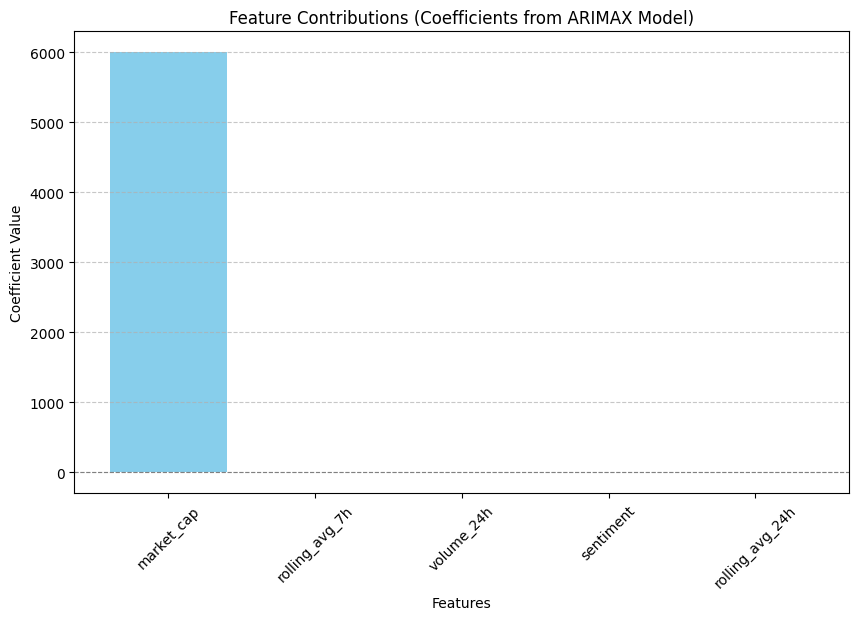

,Feature,Coefficient,p-value
1,market_cap,5996.362480,0.000000
3,rolling_avg_7h,0.043206,0.948781
0,volume_24h,0.034179,0.726438
2,sentiment,0.028229,0.548993
4,rolling_avg_24h,-0.639870,0.515890


In [ ]:
# Extract coefficients and p-values from the ARIMAX model
coefficients = arimax_fit.params
p_values = arimax_fit.pvalues

# Filter exogenous variables (features of interest)
exogenous_coefficients = coefficients[exogenous_vars]
exogenous_p_values = p_values[exogenous_vars]

# Create a DataFrame for visualization
feature_contributions = pd.DataFrame({
    'Feature': exogenous_coefficients.index,
    'Coefficient': exogenous_coefficients.values,
    'p-value': exogenous_p_values.values
}).sort_values(by='Coefficient', ascending=False)

# Plot the coefficients with p-values for quick insights
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(feature_contributions['Feature'], feature_contributions['Coefficient'], color='skyblue')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.title("Feature Contributions (Coefficients from ARIMAX Model)")
plt.ylabel("Coefficient Value")
plt.xlabel("Features")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Display feature contributions with p-values for more details
feature_contributions

feature_contributions


market_cap is the dominant feature with a significantly higher coefficient, indicating it has the most substantial impact on predicting Bitcoin's close price.